In [1]:
import clustertools as cts
import numpy as np

/usr/local/lib/python3.9/site-packages/clustertools-0.1.dev3-py3.9.egg/clustertools/analysis/profiles.py:34: FutureWarning: all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.
  warnings.warn('all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.',FutureWarning)



# Operations

## Units

First load a snapshot of a cluster in file 00000.dat, which has position units of pc and velocity units of km/s in clustercentric coordinates. Stellar masses are in solar units and were generated using a Salpeter IMF.

In [16]:
cluster=cts.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',ofilename='orbit.dat',ounits='kpckms')

When using ``load_cluster``, key parameters like the total mass and the half-mass radius of the cluster are automatically calculated:

Once initialized, the units and coordinate system of the cluster can easily be changed. Unit changes will affect the positions and velocities of stars, the location of the cluster's centre of density, and the cluster itself if its galactocentric coordinates are known. When changing units, key parameters are recalculated. As per the below example, the mean radius and ragrange radii are caclulated when the units are ``pckms``.

In [17]:
print('Mean radius with numpy =', np.mean(cluster.r))
print('Mean radius =', cluster.rmean)

print('Half mass radius =', cluster.rm)

cluster.rlagrange()
print('50% Lagrange Radius = ',cluster.rn[4])


Mean radius with numpy = 2.45102483757
Mean radius = 2.45102483757
Half mass radius = 1.96178691294
50% Lagrange Radius =  1.96178691294


As expected, both methods yield the exact same results. Since ``cluster.units`` currently eqauls ``'pckms``, radii are in parsecs. We can then convert to ``'kpckms'``:

In [18]:
cluster.to_kpckms()

Since coordinates are changed to ``'kpckms'``, stellar radii will all be changed. Hence calculating the mean radius with numpy will yield the result in kpc. ``cluster.rmean`` and ``cluster.rm`` will also change as ``cluster.analyze`` is always called after a unit change. Conversely, ``cluster.rn`` won't change unless ``cluster.rlagrange()`` is called again:

In [19]:
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)
print('Half mass radius =', cluster.rm)
print('50% Lagrange Radius = ',cluster.rn[4])


Mean radius with numpy =  0.00245102483757
Mean radius with clustertools =  0.00245102483757
Half mass radius = 0.00196178691294
50% Lagrange Radius =  1.96178691294


The only way to update the units of ``cluster.rn`` is to calculate the lagrange radii again.

In [20]:
cluster.to_kpckms()
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)

print('Half mass radius =', cluster.rm)
cluster.rlagrange()
print('50% Lagrange Radius = ',cluster.rn[4])

Mean radius with numpy =  0.00245102483757
Mean radius with clustertools =  0.00245102483757
Half mass radius = 0.00196178691294
50% Lagrange Radius =  0.00196178691294


Other unit systems include ``galpy``,``nbody``,``WDunits``, and ``radec``. For ``nbody``, most of the time a dataset is given in N-body units and then converted to physical units. However if you wish to convert to Nbody units, the scaling factors for masses, positions, velocities and time must be determined. This can be done via:

In [7]:
cluster.reset_nbody_scale()
print('MASS SCALING: ',cluster.zmbar)
print('POSITION SCALING: ',cluster.rbar)
print('VELOCITY SCALING: ',cluster.vbar)
print('TIME SCALING: ',cluster.tbar)

MASS SCALING:  349.28177634
POSITION SCALING:  2.51937714706
VELOCITY SCALING:  0.772052003633
TIME SCALING:  3.18985540807


Note that the default way of finding the position scaling is to set ``cluster.rbar`` equal to the cluster's virial radius, such that when scaled the cluster's virial radius in Nbody units is 1. A computationall cheaper approximation is to set ``cluster.rbar`` equal to 4/3 the cluster's half-mass radius with ``rvirial=False``.

In [9]:
cluster.reset_nbody_scale(rvirial=False)
print('MASS SCALING: ',cluster.zmbar)
print('POSITION SCALING: ',cluster.rbar)
print('VELOCITY SCALING: ',cluster.vbar)
print('TIME SCALING: ',cluster.tbar)

MASS SCALING:  349.28177634
POSITION SCALING:  2.61571588392
VELOCITY SCALING:  0.757701003404
TIME SCALING:  3.37455937226


Once the Nbody scaling factors have been determined, one can convert to NBODY units to make caluclations

0

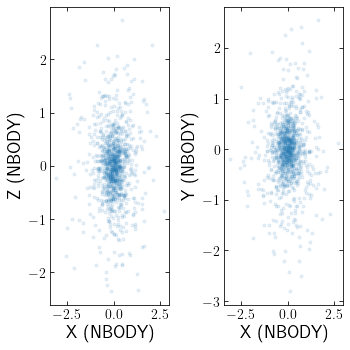

In [10]:
cluster.to_nbody()
cts.starplot(cluster)

Changing units to ``radec`` will first move the clustre onto the plane of the sky. If ``origin=galaxy`` then that is where the cluster will remain, however if ``origin=cluster`` or ``origin=centre`` then the cluster will be moved back to clustercentric coordinates using the appropriate centreing method.

0

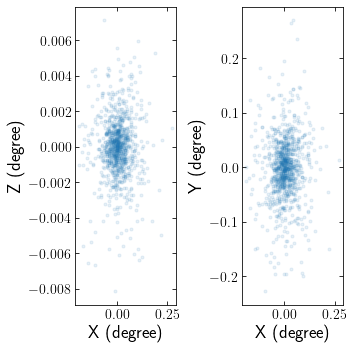

In [23]:
cluster.to_radec()
cts.starplot(cluster)

## Coordinate Systems

clustertools allows users to move their cluster between Galactocentric coordinates, clustercentric coordinates, the cluster's centre of density frame, or the plane of the sky.

Lets begin by loading a cluster snapshot in clustercentric coordinates.

Mean radius with numpy =  2.45102483757
Mean radius with clustertools =  2.45102483757
Half mass radius = 1.96178691294
50% Lagrange Radius =  1.96178691294


0

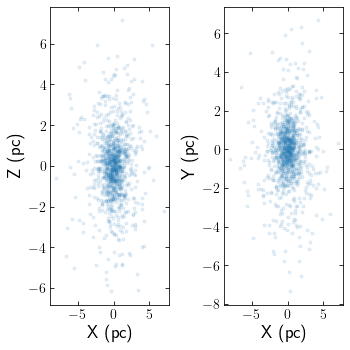

In [37]:
cluster=cts.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',ofilename='orbit.dat',ounits='kpckms')
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)
print('Half mass radius =', cluster.rm)
rln=cluster.rlagrange()
print('50% Lagrange Radius = ',cluster.rn[4])

cts.starplot(cluster)

To view your cluster in the galaxy's reference frame and calculate values in kpc:

In [38]:
cluster.to_kpckms()
cluster.to_galaxy()
rln=cluster.rlagrange()

Mean radius with numpy =  9.99998180299
Mean radius with clustertools =  9.99998180299
Half mass radius = 9.9999783598
50% Lagrange Radius =  0.00194950947706


0

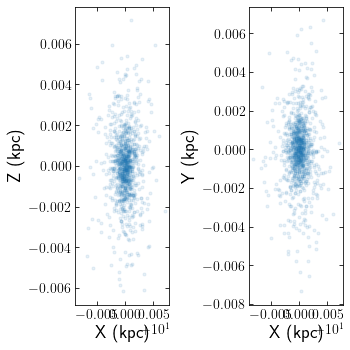

In [39]:
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)
print('Half mass radius =', cluster.rm)
print('50% Lagrange Radius = ',cluster.rn[4])

cts.starplot(cluster)

Note that the cluster's rlagrange radii have only changed units. This is because rlagrange radii, by definition, are always calculated with respect to the cluster's centre.

Two functions worth noting are ``save_cluster`` and ``return_cluster``. ``save_cluster`` will return the current units and origin of your cluster, so you can then i) change units/coordinate systems, ii) make calculates, and then return your cluster to its original state using ``return_cluster``.

For example, with the above cluster having ``units='kpckms'`` and ``origin='galaxy'``, one may wish to switch to the clustercentric frame of reference to calculate the half-mass radius:

In [40]:
#Save Cluster
units,origin,rorder,rorder_origin=cts.save_cluster(cluster)
print(units,origin)
#Move to clustercentric coordinates
cluster.to_cluster()
print('Half mass radius = ',cluster.rm)
#Move back
cts.return_cluster(cluster,units,origin,rorder,rorder_origin)
print(cluster.units,cluster.origin)

kpckms galaxy
Half mass radius =  0.00196178691294
kpckms galaxy


It is worth noting that if ``cluster.units='galaxy'``, almost all functions will move the cluster to a clustercentric coordinate system or to its centre of density to make calculations and then return it to its original state.

Finally, two operations that may be helpful when trying to initialize a cluster are ``virialize`` and ``add_rotation``. ``virialize`` will scale all the stellar velocities so the virial parameter is exactly 0.5.

In [41]:
#At the moment, our cluster is not perfectly in virial equilibrium:
cluster.energies()
print(cluster.qvir)
#However it can be scaled such that ``cluster.qvir=-0.5``
cluster.virialize()
cluster.energies()

print('New Qv: ',cluster.qvir)


-1.40814083302
New Qv:  -0.504310752662


Adding rotation will, as the name implies, add a degree of rotation to the cluster. Rotation is added using the ``qrot`` parameter, which will be the fraction of stars with v_phi < 0 that are switched to having vphi > 0. It can be done via:

In [42]:
#How many stars have vtheta < 0 in the clustercentric coordinate system
cluster.to_cluster()
r, theta, z, vr, vtheta, vz=cts.cart_to_cyl(cluster.x,cluster.y,cluster.z,cluster.vx,cluster.vy,cluster.vz)
print('Fraction of stars with vtheta<0 =', np.sum(vtheta<0)/cluster.ntot)

#Now switch the sign of vtheta for 50% of stars with vtheta<0
print('Add rotation of 50%')
cluster.add_rotation(qrot=0.5)
r, theta, z, vr, vtheta, vz=cts.cart_to_cyl(cluster.x,cluster.y,cluster.z,cluster.vx,cluster.vy,cluster.vz)
print('Now fraction of stars with vtheta<0 =', np.sum(vtheta<0)/cluster.ntot)


Fraction of stars with vtheta<0 = 0.52
Add rotation of 50%
Now fraction of stars with vtheta<0 = 0.249
